### A/B Testing
1. A/B testing is used to test different advertising scenaros. This involes splitting users into 'control' and 'treatment' groups.
2. The point estimate (sample statistic): We need to generate a bootstrap distribution of sample means to create a list of sample means.
3. `Z-scores`= $\frac{Observation - Mean}{Standard deviaiton}$<br>
4. `Standard Normal (Z) Distribution` :  with mean = 0 and standard deviaition = 1 .

### P-values
- `p-values` always between 0 and 1.
`p-values` measure the strength of support for the `null hypothesis`, they measure the probability of obtaining a result, assuming the null hypothesis is true. <br>
- **Large** `p-values` mean our statistic is producing a result that is likely **not in a tail** of our null distribution, and chance could be a good explanation for the result. -->**fail to reject ${H_0}$** <br>
- **Small** `p-values` mean our statistic is producing a result likely **in the tail** of our null distribution.-->**reject ${H_0}$**

- `norm.cdf()` is normal CDF (Cumulative distribution function) from `scipy.stats`.
- The location `(loc)` specifies the mean. The scale `(scale)` specifies the standard deviation.
- Left-tailed test --> use `norm.cdf()`.  ${H_0} < {H_1}$.
- Right- tailed test --> use `1 - norm.cdf()`.  ${H_0} > {H_1}$.
- Two- tailed test -->  ${H_0} \neq {H_1}$.

### Significance level ( $\alpha$ )
- Common values of $\alpha$ are `0.2`, `0.1`, `0.05` and `0.01`.
- If ${p}\le\alpha$, reject ${H_0}$.
- $\alpha$ should be set **prior** to conducting hypothesis test.

### Deciding Between Z-Test and T-Test
<img src="https://av-eks-blogoptimized.s3.amazonaws.com/Screenshot-from-2020-03-04-15-29-37.jpg" style="height:300px" /><br>
- If the sample size is **large enough**, then the z-Test and t-Test will conclude with the same results. <br>
- For a large sample, Sample Variance will be a better estimate of Population variance, so even if population variance is unknown we can use the z-test using sample variance.<br>
- Similarly, for a Large Sample, we have a high degree of freedom. And since t-distribution approaches the normal distribution, the difference between the z score and t score is negligible.<br>
- reference : https://www.analyticsvidhya.com/blog/2020/06/statistics-analytics-hypothesis-testing-z-test-t-test/#What_is_Hypothesis_Testing?

|  | Z Test | T Test |
| --- | --- | --- |
| **Assumption** | Population standard deviation is known | Population standard deviation is unknown |
| **Sample Size** | Large sample size ( n > 30) | Small sample size ( n < 30) |
| **Distribution** | Z-distribution | T-distribution) |
| **Degrees of Freedom** | Not applicable | n – 1 |

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
late_shipments = pd.read_feather('/Users/florahuang/Desktop/practice datasets/late_shipments.feather')

## 1. One-Sample Test
### Calculating the sample mean
The `late_shipments` dataset contains supply chain data on the delivery of medical supplies. <br>Each row represents one delivery of a part. The **late** columns denotes whether or not the part was delivered late.<br>
A value of **"Yes"** means that the part was delivered late, and a value of **"No"** means the part was delivered on time.

In [3]:
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,vendor,item_description,molecule_test_type,brand,dosage,dosage_form,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,N/A,Test kit,100.0,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit, 20 Tests","HIV 1/2, Uni-Gold HIV Kit",Uni-Gold,N/A,Test kit,20.0,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,HETERO LABS LIMITED,"Lamivudine/Nevirapine/Stavudine 150/200/30mg, ...",Lamivudine/Nevirapine/Stavudine,Generic,150/200/30mg,Tablet - FDC,60.0,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,Aurobindo Pharma Limited,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60.0,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,"Orgenics, Ltd","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs",Generic,N/A,Test kit - Ancillary,100.0,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [4]:
# Calculate the proportion of late shipments
late_prop_samp = (late_shipments['late']=='Yes').mean()
print(late_prop_samp)

0.061


In [5]:
late_shipments_boot_distn = []
for i in range(5000):
    late_shipments_boot_distn.append(
        np.mean(
            # To sample with replacement, we call replace argument to True. 
            # Setting frac to 1 produces a sample of the same size as the original dataset.
            late_shipments.sample(frac=1, replace=True)['late_delivery']
                )
    )

(array([   9.,   58.,  328., 1000., 1246., 1356.,  756.,  208.,   36.,
           3.]),
 array([0.033 , 0.0388, 0.0446, 0.0504, 0.0562, 0.062 , 0.0678, 0.0736,
        0.0794, 0.0852, 0.091 ]),
 <BarContainer object of 10 artists>)

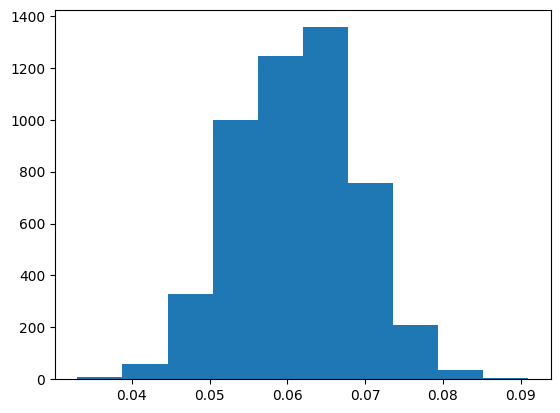

In [6]:
plt.hist(late_shipments_boot_distn)

In [7]:
# Hypothesize that the proportion is 6%
late_prop_hyp = 0.06

# Calculate the sample standard error (degree of freedom=1)
std_error = np.std(late_shipments_boot_distn)

# Find z-score of late_prop_samp
z_score = (late_prop_samp-late_prop_hyp)/std_error

print(z_score)

0.1305824489732285


### Hypothesis
- ${H_0}$ : the proportion of late shipments is 6%.
- ${H_1}$ : the proportion of late shipments is **greater** than 6%.
- Set $\alpha = 0.05$ --> 95% confidence interval.

In [8]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

print((lower, upper))

(0.046, 0.076)


In [9]:
from scipy.stats import norm

# Calculate the p-value
p_value = 1- norm.cdf(z_score,loc=0,scale=1)
print(p_value) 

0.4480528137591253


0.06 is included in the 95% confidence interval and we failed to reject ${H_0}$ due to a large p-value, the results are similar.

- Comment: p-value smaller than confidence interval (0.05), reject the null hypothesis that late shipment proportion is 6%.

### Type of Errors
<img src="https://miro.medium.com/v2/resize:fit:1400/1*uF5aBZ63BZ8IDEyF8wo-CA.png" style="height:300px" />

In [10]:
# Calculate 95% confidence interval using quantile method
lower = np.quantile(late_shipments_boot_distn, 0.025)
upper = np.quantile(late_shipments_boot_distn, 0.975)

# Print the confidence interval
print((lower, upper))

(0.046, 0.076)


## 2. T-test, Two-sample test
### ${t} = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{S_1^2}{n_1} + \frac{S_2^2}{n_2}}}$

### Problem :
While trying to determine why some shipments are late, we may wonder if the weight of the shipments that were on time is less than the weight of the shipments that were late.<br>
The late_shipments dataset has been split into a `"yes"` group, where `late == "Yes"` and a `"no"` group where `late == "No"`. The weight of the shipment is given in the `weight_kilograms` variable.

- ${H_0}$: The mean weight of shipments that weren't late ( $\bar{X_1}$ = `no`) is the same as the mean weight of shipments that were late ( $\bar{X_2}$ = `yes`).

- ${H_1}$: The mean weight of shipments that weren't late ( $\bar{X_1}$ = `no`) is less than the mean weight of shipments that were late ( $\bar{X_2}$ = `yes`).
- **$\alpha$** = `0.05`

In [11]:
# Calculate the sample means
xbar_yes = late_shipments.groupby('late')['weight_kilograms'].mean()["Yes"]
xbar_no = late_shipments.groupby('late')['weight_kilograms'].mean()["No"]

# Numbers of samples
n_yes = len(late_shipments[late_shipments.late =='Yes'])
n_no = len(late_shipments[late_shipments.late =='No'])

# Calculate the sample standard error
s_yes = late_shipments.groupby('late')['weight_kilograms'].std()["Yes"]
s_no = late_shipments.groupby('late')['weight_kilograms'].std()["No"]

# Calculate the numerator of the test statistic
numerator = xbar_no - xbar_yes

# Calculate the denominator of the test statistic
denominator = np.sqrt((s_no**2/n_no) + (s_yes**2/n_yes))

# Calculate the test statistic
t_stat = numerator / denominator

print(t_stat)

-2.3936661778766433


### T-distribution
- Looks like `Normal (z) distributioin`. with **fatter** tails. <br>
- **Larger** degree of freedom (df), getting closer to normal distribution. <br>
- Nomal distribution = t-distribution with **infinite df**.<br>
<img src="https://www.scribbr.com/wp-content/uploads/2020/08/t_distribution_comparisons.png" style="height:500px" />

In [12]:
from scipy.stats import t

# Calculate the degrees of freedom
degrees_of_freedom = n_no +n_yes -2

# Calculate the p-value from the test stat
p_value = t.cdf(t_stat, df=degrees_of_freedom)
print(p_value)

0.008432382146249525


- Comment : Reject the `Null hypothesis`.

## 3.  Paired T-test
### US Democratic presidents dataset
#### **Question** : Was the percentage of democradic candidate votes in 2012 lower than 2016?
- ${H_0}$ : $\mu_{2012} - \mu_{2016} = 0$
- ${H_1}$ : $\mu_{2012} \neq \mu_{2016} $
- $\alpha = 0.05$ <br>
#### Data is paired, each voter percentage refers to the same county.

In [13]:
sample_dem_data = pd.read_feather('/Users/florahuang/Desktop/practice datasets/us_dem_votes_potus_12_16.feather')
sample_dem_data.head()

,state,county,dem_percent_12,dem_percent_16
0,Alabama,Bullock,76.305900,74.946921
1,Alabama,Chilton,19.453671,15.847352
2,Alabama,Clay,26.673672,18.674517
3,Alabama,Cullman,14.661752,10.028252
4,Alabama,Escambia,36.915731,31.020546


### Revised hypothesis 
- ${H_0}$ : $\mu_{diff} = 0$
- ${H_1}$ : $\mu_{diff} < 0$
<br><br>
- ${t} = \frac{\bar{X_{diff}} - {\mu_{diff}}}{\sqrt{\frac{S_{diff}^2}{n_{diff}}}}$
<br><br>
- ${df} = {n_{diff}} - 1$

In [14]:
# Calculate the differences from 2012 to 2016
sample_dem_data['diff'] = sample_dem_data['dem_percent_12'] - sample_dem_data['dem_percent_16']
sample_dem_data.head()

,state,county,dem_percent_12,dem_percent_16,diff
0,Alabama,Bullock,76.305900,74.946921,1.358979
1,Alabama,Chilton,19.453671,15.847352,3.606319
2,Alabama,Clay,26.673672,18.674517,7.999155
3,Alabama,Cullman,14.661752,10.028252,4.633500
4,Alabama,Escambia,36.915731,31.020546,5.895185


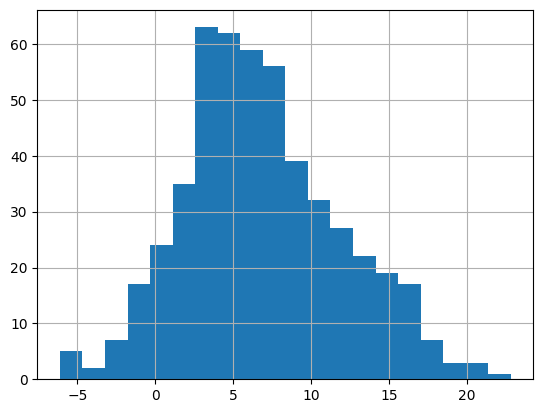

In [15]:
# Plot a histogram of diff with 20 bins
sample_dem_data['diff'].hist(bins=20)
plt.show()

In [16]:
# Find the mean and standard deviation of the diff column
xbar_diff = sample_dem_data['diff'].mean()
s_diff = sample_dem_data['diff'].std()
n_diff = len(sample_dem_data)
print(xbar_diff)
print(s_diff)

6.829312660106834
5.040139140132317


In [17]:
# If null hypothesis is true, the diff of populaation is 0.
t_stat = (xbar_diff - 0) / np.sqrt(s_diff**2/n_diff)
degree_of_freedom = n_diff - 1

# Two tailed t-test
p_value  = 2*(1-t.cdf(t_stat, df = degree_of_freedom))
print(p_value)

0.0


### We can also use `pingouin` library

In [18]:
import pingouin
# Conduct a t-test on diff
test_results = pingouin.ttest(x=sample_dem_data['diff'],y=0, paired=True, alternative='two-sided')
test_results

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/parametric.py:228: UserWarning: x and y have unequal sizes. Switching to paired == False. Check your data.
  warnings.warn("x and y have unequal sizes. Switching to paired == False. Check your data.")


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",1.354985,2.246e+111,1.0


In [19]:
# Conduct a t-test on both individuals
test_results = pingouin.ttest(x=sample_dem_data['dem_percent_12'],y=sample_dem_data['dem_percent_16'],
                              paired=True, alternative='two-sided')
test_results

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,30.298384,499,two-sided,3.600634e-115,"[6.39, 7.27]",0.454202,2.246e+111,1.0


- Comment : Reject the null hypothesis.

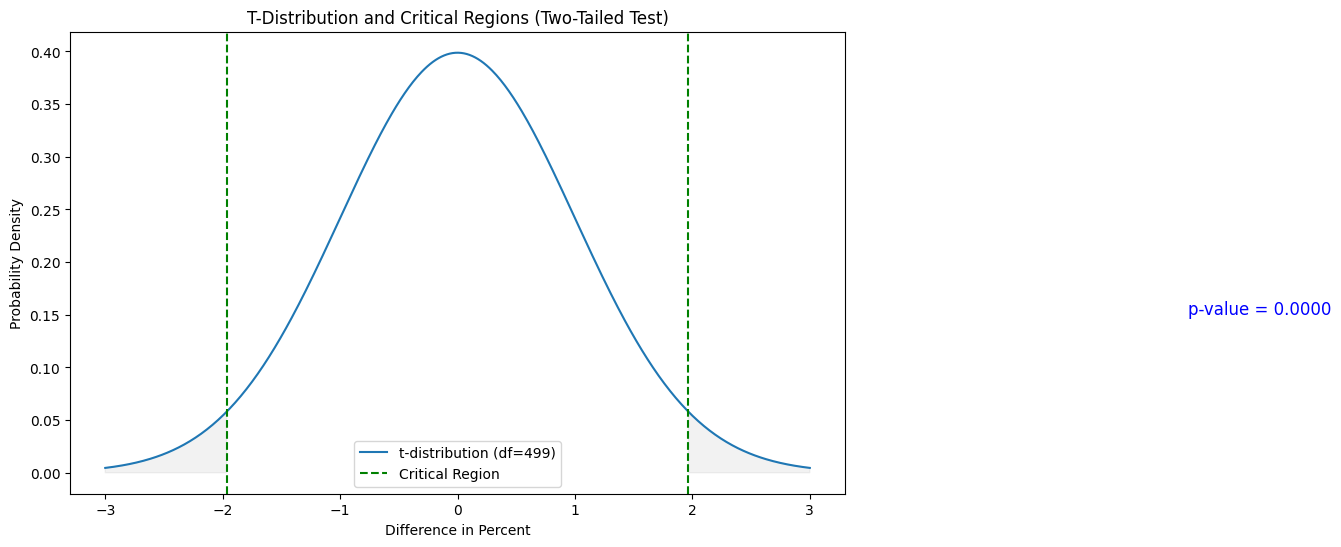

In [20]:
alpha = 0.05
# Calculate t-statistic
t_stat = (xbar_diff - 0) / np.sqrt(s_diff**2/n_diff)

# Calculate p-value for two-tailed test
p_value = 2 * (1 - t.cdf(np.abs(t_stat), df=degree_of_freedom))

# Create a range of x values for the t-distribution
x_values = np.linspace(-3, 3, 500)  # Adjust the range as needed

# Calculate the t-distribution values
t_values = t.pdf(x_values, df=degree_of_freedom, loc=0, scale=1)

# Calculate critical t-values for two-tailed test
t_critical_left = t.ppf(alpha / 2, df=degree_of_freedom)
t_critical_right = t.ppf(1 - alpha / 2, df=degree_of_freedom)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, t_values, label=f't-distribution (df={degree_of_freedom})')
#plt.axvline(x=xbar_diff, color='r', linestyle='--', label='Sample Mean')
plt.axvline(x=t_critical_left, color='g', linestyle='--', label='Critical Region')
plt.axvline(x=t_critical_right, color='g', linestyle='--')

plt.fill_between(x_values, t_values, 
                 where=(x_values <= t_critical_left) | (x_values >= t_critical_right), 
                 alpha=0.1, color='gray')

plt.text(xbar_diff, 0.15, f'p-value = {p_value:.4f}', color='b', fontsize=12, ha='center')
plt.xlabel('Difference in Percent')
plt.ylabel('Probability Density')
plt.title('T-Distribution and Critical Regions (Two-Tailed Test)')
plt.legend()
plt.show()

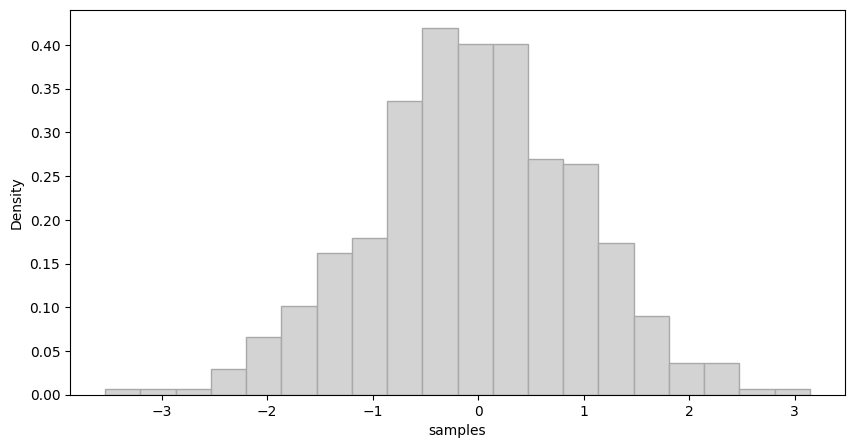

In [21]:
n = 500
df = n - 1
rand_t_samples = t.rvs(df, loc=0, scale=1, size=n)
plt.figure(figsize=(10, 5))
plt.hist(
    rand_t_samples, density=True, color="lightgrey", edgecolor="darkgrey", bins=20
)
plt.xlabel("samples")
plt.ylabel("Density")
plt.show()

https://www.geo.fu-berlin.de/en/v/soga-py/Basics-of-statistics/Continous-Random-Variables/Students-t-Distribution/Students-t-Distribution-in-Python/index.html

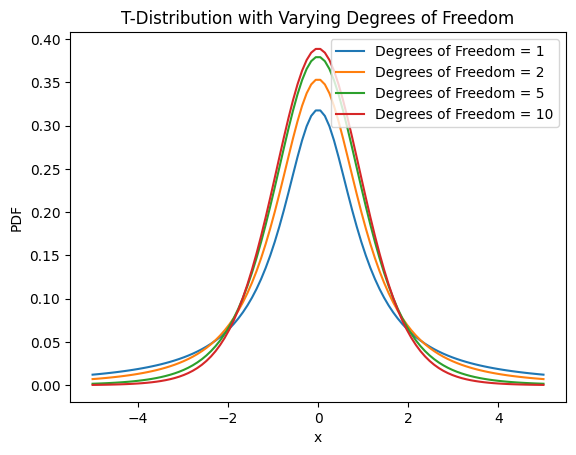

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t
 
x = np.linspace(-5, 5, 100)
degrees_of_freedom = [1, 2, 5, 10]  # Varying degrees of freedom
 
# Plotting T-distribution curves for different degrees of freedom
for df in degrees_of_freedom:
    y = t.pdf(x, df)  # Using default location and scale parameters (0 and 1)
    plt.plot(x, y, label=f"Degrees of Freedom = {df}")
 
plt.xlabel('x')
plt.ylabel('PDF')
plt.title('T-Distribution with Varying Degrees of Freedom')
plt.legend()
plt.show()

### ANOVA (Analysis of Variance)
- ANOVA test used to compare the means of more than 2 groups ( t-test or Z-test can be used to compare 2 groups )
- ANOVA tests if there is a difference in the mean somewhere in the model, but it does not tell us where the difference is. To find where the difference is between the groups, we have to conduct `Post-hoc` tests.<br>
`Post-hoc tests` tell the researcher which groups are different from each other.<br>
There are several multiple comparison tests that can be conducted that will control for **Type I error**, including `Bonferroni`, `Scheffe`, `Dunnet`, and `Tukey` tests.


${H_0}$ : There is no significant difference among the groups.<br>
${H_1}$ : There is a significant difference among the groups.<br>

- ANOVA is performed by comparing two types of variation, **the variation between the sample means**, as well as **the variation within each of the samples**.

- The result of the ANOVA, the **F statistic**, allows for the analysis of multiple groups of data to determine the variability between samples and within samples.
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/06/ANOVA_3.png" style="height:200px" />

### Types of ANOVA Tests
**1. One-Way ANOVA**: has just one independent variable<br>
For example, differences in Corona cases can be assessed by Country, and a Country can have 2, 20, or more to compare<br><br>
**2. Two-Way ANOVA**: refers to an ANOVA using two independent variables<br>
Expanding the example above, a two-way ANOVA can examine differences in Corona cases (the dependent variable) by Age group (independent variable 1) and Gender (independent variable 2). <br><br>
**3. N-Way ANOVA**: with n numbers of independent variables you have, aka MANOVA Test.
For example, potential differences in Corona cases can be examined by Country, Gender, Age group, Ethnicity, etc, simultaneously

https://www.analyticsvidhya.com/blog/2020/06/introduction-anova-statistics-data-science-covid-python/<br>
https://www.reneshbedre.com/blog/anova.html

### late shipment data
**Question** : How the price of each package (`pack_price`) varies between the three shipment modes (`shipment_mode`): "Air", "Air Charter", and "Ocean".

- ${H_0}$: Pack prices for every category of shipment mode are the same.
- ${H_1}$: Pack prices for some categories of shipment mode are different.
- significance level of 0.1.

In [23]:
late_shipments["shipment_mode"].value_counts()

shipment_mode
Air            906
Ocean           88
Air Charter      6
Name: count, dtype: int64

In [24]:
# Calculate the mean pack_price for each shipment_mode
xbar_pack_by_mode = late_shipments.groupby('shipment_mode')['pack_price'].mean()
print(xbar_pack_by_mode)

shipment_mode
Air            39.712395
Air Charter     4.226667
Ocean           6.432273
Name: pack_price, dtype: float64


In [25]:
# Calculate the standard deviation of the pack_price for each shipment_mode
s_pack_by_mode = late_shipments.groupby("shipment_mode")['pack_price'].std()
print(s_pack_by_mode)

shipment_mode
Air            48.932861
Air Charter     0.992969
Ocean           5.303047
Name: pack_price, dtype: float64


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


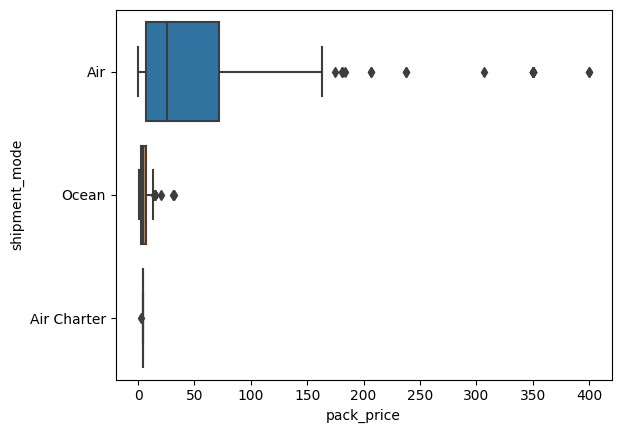

In [26]:
import seaborn as sns

# Boxplot of shipment_mode vs. pack_price
sns.boxplot(data=late_shipments, x="pack_price",y='shipment_mode')
plt.show()

In [27]:
# Run an ANOVA for pack_price across shipment_mode
anova_results = pingouin.anova(data=late_shipments, dv='pack_price',between='shipment_mode')

# Print anova_results
print(anova_results)

          Source  ddof1  ddof2        F         p-unc       np2
0  shipment_mode      2    997  21.8646  5.089479e-10  0.042018


- Comment : ${p} < 0.1$, Reject the null hypothesis.

### Pairwise t-tests
The ANOVA test didn't tell  which categories of shipment mode had significant differences in pack prices. To pinpoint which categories had differences, you could instead use **pairwise t-tests**.

In [28]:
# Perform a pairwise t-test on pack price, grouped by shipment mode
pairwise_results = pingouin.pairwise_tests(data=late_shipments, dv='pack_price',
                                           between='shipment_mode',alternative='two-sided') 

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc       BF10    hedges  
0  600.685682   two-sided  8.748346e-75  5.809e+76  0.726592  
1  986.979785   two-sided  6.934555e-71  1.129e+67  0.711119  
2   35.615026   two-sided  3.123012e-03     15.277 -0.423775  


In [29]:
# Modify the pairwise t-tests to use Bonferroni p-value adjustment
pairwise_results = pingouin.pairwise_tests(data=late_shipments, 
                                           dv="pack_price",
                                           between="shipment_mode",
                                           padjust="bonf")

# Print pairwise_results
print(pairwise_results)

        Contrast            A            B  Paired  Parametric          T  \
0  shipment_mode          Air  Air Charter   False        True  21.179625   
1  shipment_mode          Air        Ocean   False        True  19.335760   
2  shipment_mode  Air Charter        Ocean   False        True  -3.170654   

          dof alternative         p-unc        p-corr p-adjust       BF10  \
0  600.685682   two-sided  8.748346e-75  2.624504e-74     bonf  5.809e+76   
1  986.979785   two-sided  6.934555e-71  2.080367e-70     bonf  1.129e+67   
2   35.615026   two-sided  3.123012e-03  9.369037e-03     bonf     15.277   

     hedges  
0  0.726592  
1  0.711119  
2 -0.423775  


- Comment : All the paired groups' ${p} < 0.1$, Reject the null hypothesis between all.

### One-sample Proportion test
A bootstrap distribution can be computationally expensive to calculate, so this time we'll instead calculate the test statistic without it.

#### Standardized test statistic for proportion ${z}$
- ${p}$ : Population proportion (unknown population parameter)
- ${\hat{p}}$ ; Sample statistic
- ${p_0}$ : Hypothesized population proportion

     ### ${z} = \frac{\hat{p} - mean(\hat{p})}{SE(\hat{p})}$ = $\frac{\hat{p} - p}{SE(\hat{p})}$ <br>
- Assuming ${H_0}$ is true, ${p} = {p_0}$, so <br>
     ### ${z} = \frac{\hat{p} - ({p_0})}{SE(\hat{p})}$
     ### ${z} = \frac{\hat{p} - ({p_0})}{\sqrt{\frac{p_0 * (1 - {P_0})}{n}}}$

### late shipment data
- ${H_0}$ : the proportion of late shipments is 6%.
- ${H_1}$ : the proportion of late shipments is **greater** than 6%.
- Set $\alpha = 0.05$ --> 95% confidence interval.

In [30]:
# Hypothesize that the proportion of late shipments is 6%
p_0 = 0.06

# Calculate the sample proportion of late shipments
p_hat = (late_shipments['late'] == "Yes").mean()

# Calculate the sample size
n = len(late_shipments)

# Print p_hat and n
print(p_hat, n)

0.061 1000


In [31]:
# Calculate the numerator and denominator of the test statistic
numerator = p_hat-p_0
denominator = np.sqrt(p_0*(1-p_0)/n)

# Calculate the test statistic
z_score = numerator/denominator

# Print the result
print(z_score)

0.13315591032282698


In [32]:
# Calculate the p-value from the z-score
p_value = 1- norm.cdf(z_score,0,1)

# Print the p-value
print(p_value)

0.44703503936503364


### Two-sample Proportion test
**Question** : Whether the amount paid for shipping affects whether the shipment is delayed. 
In the `late_shipments` dataset, whether or not the shipment was late is stored in the `late` column. Freight costs are stored in the `freight_cost_group` column, and the categories are `expensive` and `reasonable`.

The hypotheses to test, with `late` corresponding to the proportion of late shipments for that group, are

- ${H_0}$ : ${late_{expensive}}  - {late_{reasonable}} = 0$
- ${H_1}$ : ${late_{expensive}}  - {late_{reasonable}} > 0$

`p_hats` contains the estimates of population proportions (sample proportions) for each `freight_cost_group`:

In [33]:
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,vendor,item_description,molecule_test_type,brand,dosage,dosage_form,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,N/A,Test kit,100.0,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit, 20 Tests","HIV 1/2, Uni-Gold HIV Kit",Uni-Gold,N/A,Test kit,20.0,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,HETERO LABS LIMITED,"Lamivudine/Nevirapine/Stavudine 150/200/30mg, ...",Lamivudine/Nevirapine/Stavudine,Generic,150/200/30mg,Tablet - FDC,60.0,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,Aurobindo Pharma Limited,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60.0,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,"Orgenics, Ltd","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs",Generic,N/A,Test kit - Ancillary,100.0,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [34]:
p_hats = late_shipments.groupby('freight_cost_groups')['late'].value_counts(normalize=True).unstack()['Yes']
p_hats

freight_cost_groups
expensive     0.079096
reasonable    0.035165
Name: Yes, dtype: float64

In [35]:
ns = late_shipments.groupby("freight_cost_groups")['late'].count()
ns

freight_cost_groups
expensive     531
reasonable    455
Name: late, dtype: int64

In [36]:
# Calculate the pooled estimate of the population proportion
p_hat = (p_hats["reasonable"] * ns["reasonable"] + p_hats["expensive"] * ns["expensive"])/(ns["reasonable"] + ns["expensive"])

# Print the result
print(p_hat)

0.058823529411764705


In [37]:
# Calculate p_hat one minus p_hat
p_hat_times_not_p_hat = p_hat * (1 - p_hat)

# Divide this by each of the sample sizes and then sum
p_hat_times_not_p_hat_over_ns = p_hat_times_not_p_hat / ns["expensive"] + p_hat_times_not_p_hat / ns["reasonable"]

# Calculate the standard error
std_error = np.sqrt(p_hat_times_not_p_hat_over_ns)

# Print the result
print(std_error)

0.015031300895066685


In [38]:
# Calculate the z-score
z_score = (p_hats["expensive"]-p_hats["reasonable"] )/std_error

# Print z_score
print(z_score)

2.922648567784529


In [39]:
# Calculate the p-value from the z-score
p_value = 1-norm.cdf(z_score,0,1)

# Print p_value
print(p_value)

0.0017353400023595311


#### Using `proportions_ztest` library

In [40]:
# Count the late column values for each freight_cost_group
late_by_freight_cost_group = late_shipments.groupby('freight_cost_groups')['late'].value_counts()

# Print the counts
print(late_by_freight_cost_group)

freight_cost_groups  late
expensive            No      489
                     Yes      42
reasonable           No      439
                     Yes      16
Name: count, dtype: int64


In [41]:
from statsmodels.stats.proportion import proportions_ztest

# Create an array of the "Yes" counts for each freight_cost_groups
success_counts = np.array([42, 16])

# Create an array of the total number of rows in each freight_cost_groups
n = np.array([42 + 489, 16 + 439])

# Run a z-test on the two proportions
stat, p_value = proportions_ztest(count=success_counts, nobs=n,
                                  alternative="larger")
# Print the results
print(stat, p_value)

2.922648567784529 0.001735340002359578


### Chi-square Test
- To test for independence of variables
- Chi-square result is equal to (z-score) $^2$
- The chi-square independence test compares proportions of successes of one categorical variable across the categories of another categorical variable. <br>

**Question** : Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or incoterms for short. <br>
The `late_shipments` dataset includes a `vendor_inco_term` that describes the incoterms that applied to a given shipment. The choices are:<br>
- `EXW`: "Ex works". The buyer pays for transportation of the goods. <br>
- `CIP`: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship. <br>
- `DDP`: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port. <br>
- `FCA`: "Free carrier". The seller pays for transportation of the goods. <br><br>

- ${H_0}$ : `vendor_inco_term` and `freight_cost_groups` are independent.
- ${H_1}$ : `vendor_inco_term` and `freight_cost_groups` are associated.
- Significance level = `0.01`

In [42]:
late_shipments.head()

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,vendor,item_description,molecule_test_type,brand,dosage,dosage_form,unit_of_measure_per_pack,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,"Orgenics, Ltd","HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,N/A,Test kit,100.0,2996.0,266644.00,89.00,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,"Trinity Biotech, Plc","HIV 1/2, Uni-Gold HIV Kit, 20 Tests","HIV 1/2, Uni-Gold HIV Kit",Uni-Gold,N/A,Test kit,20.0,25.0,800.00,32.00,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,HETERO LABS LIMITED,"Lamivudine/Nevirapine/Stavudine 150/200/30mg, ...",Lamivudine/Nevirapine/Stavudine,Generic,150/200/30mg,Tablet - FDC,60.0,22925.0,110040.00,4.80,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57
3,17648.0,South Africa,PMO - US,Direct Drop,DDP,Ocean,0.0,No,ARV,Adult,Aurobindo Pharma Limited,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60.0,152535.0,361507.95,2.37,0.04,"Aurobindo Unit III, India",Yes,7698.0,11372.23,expensive,779.41
4,5647.0,Uganda,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test - Ancillary,"Orgenics, Ltd","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs","HIV, Lancet, Safety, for HIV Test kits, 100 Pcs",Generic,N/A,Test kit - Ancillary,100.0,850.0,8.50,0.01,0.00,Inverness Japan,Yes,56.0,360.00,reasonable,0.01


In [43]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)
props

vendor_inco_term  freight_cost_groups
CIP               reasonable             0.680000
                  expensive              0.320000
DDP               expensive              0.550000
                  reasonable             0.450000
DDU               reasonable             1.000000
EXW               expensive              0.583448
                  reasonable             0.416552
FCA               reasonable             0.663636
                  expensive              0.336364
Name: proportion, dtype: float64

In [44]:
# Convert props to wide format
wide_props = props.unstack()
print(wide_props)

freight_cost_groups  expensive  reasonable
vendor_inco_term                          
CIP                   0.320000    0.680000
DDP                   0.550000    0.450000
DDU                        NaN    1.000000
EXW                   0.583448    0.416552
FCA                   0.336364    0.663636


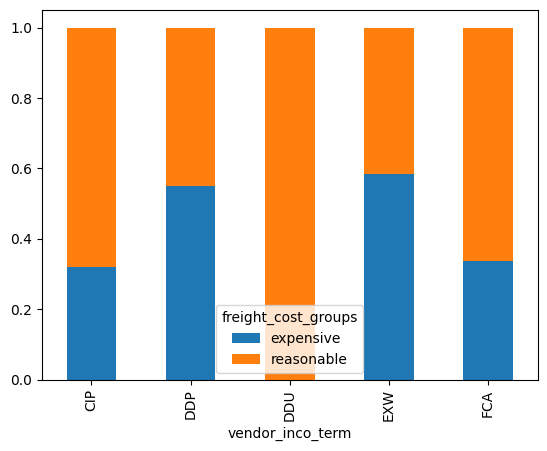

In [45]:
# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
wide_props.plot(kind='bar', stacked=True)
plt.show()

In [46]:
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, 
                                                       x='freight_cost_groups', y='vendor_inco_term')

print(stats[stats['test'] == 'pearson'])

      test  lambda       chi2  dof          pval    cramer     power
0  pearson     1.0  34.805072  4.0  5.093922e-07  0.186561  0.999235


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/contingency.py:150: UserWarning: Low count on observed frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pingouin/contingency.py:150: UserWarning: Low count on expected frequencies.
  warnings.warn("Low count on {} frequencies.".format(name))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:8073: RuntimeWarning: divide by zero encountered in power
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:8073: RuntimeWarning: invalid value encountered in multiply
  terms = f_obs * ((f_obs / f_exp)**lambda_ - 1)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/stats/_stats_py.py:8070: RuntimeWarning: divide by z

- Comment : Reject the null hypothesis, conclude `vendor_inco_term` and `freight_cost_groups` are associated.

In [47]:
expected

vendor_inco_term,CIP,DDP,DDU,EXW,FCA
freight_cost_groups,,,,,
expensive,26.926978,53.853955,0.53854,390.441176,59.239351
reasonable,23.073022,46.146045,0.46146,334.558824,50.760649


In [48]:
observed

vendor_inco_term,CIP,DDP,DDU,EXW,FCA
freight_cost_groups,,,,,
expensive,16,55,0,423,37
reasonable,34,45,1,302,73


In [49]:
stats

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.000000,34.805072,4.0,5.093922e-07,0.186561,0.999235
1,cressie-read,0.666667,34.845134,4.0,4.998337e-07,0.186669,0.999244
2,log-likelihood,0.000000,35.442911,4.0,3.767119e-07,0.188263,0.999361
3,freeman-tukey,-0.500000,NaN,4.0,NaN,NaN,NaN
4,mod-log-likelihood,-1.000000,inf,4.0,0.000000e+00,inf,NaN
5,neyman,-2.000000,NaN,4.0,NaN,NaN,NaN
